<a href="https://colab.research.google.com/github/NSNNNN/DBSCAN_Epsilon_Selection/blob/main/DBSCAN_Epsilon_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline


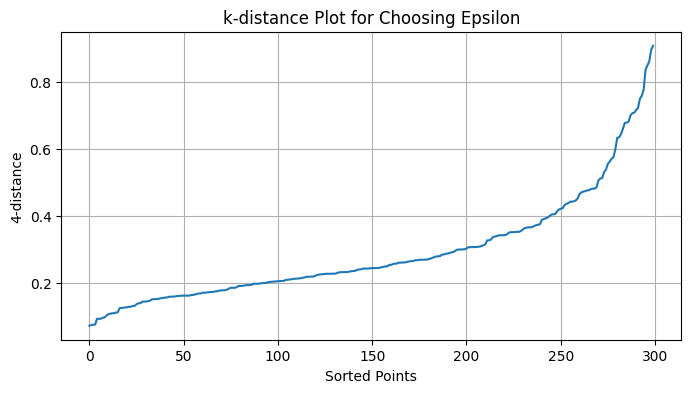

In [2]:
# تولید داده نمونه
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# روش k-distance plot
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X)
distances, _ = neighbors.kneighbors(X)

k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel("Sorted Points")
plt.ylabel(f"{k}-distance")
plt.title("k-distance Plot for Choosing Epsilon")
plt.grid(True)
plt.show()


In [3]:
# اجرای DBSCAN با چند مقدار epsilon
for eps in [0.2, 0.3, 0.4, 0.5]:
    model = DBSCAN(eps=eps, min_samples=4)
    labels = model.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise = list(labels).count(-1)
    print(f"Epsilon={eps} -> Clusters: {n_clusters}, Noise points: {noise}")


Epsilon=0.2 -> Clusters: 12, Noise points: 173
Epsilon=0.3 -> Clusters: 10, Noise points: 58
Epsilon=0.4 -> Clusters: 5, Noise points: 31
Epsilon=0.5 -> Clusters: 4, Noise points: 14
